In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
np.random.seed(420)
songs = pd.read_csv('training_data.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()
classify_songs =  pd.read_csv('songs_to_classify.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()


[0.7373333333333334, 0.71199999999999997, 0.77600000000000002, 0.79066666666666663, 0.82933333333333326, 0.78000000000000003, 0.78800000000000003, 0.82666666666666677, 0.82000000000000006, 0.81599999999999984, 0.81999999999999995, 0.81733333333333325, 0.81733333333333336, 0.82800000000000007, 0.82266666666666666, 0.82666666666666655, 0.83466666666666678, 0.81333333333333324, 0.83066666666666666, 0.83200000000000007, 0.82400000000000007, 0.83066666666666644, 0.82533333333333336, 0.83200000000000007, 0.82266666666666666, 0.83200000000000007, 0.83733333333333326, 0.83466666666666678, 0.82400000000000007, 0.82933333333333348, 0.84000000000000008, 0.82933333333333326, 0.82666666666666677, 0.83733333333333348, 0.82266666666666666, 0.81999999999999995, 0.82400000000000007, 0.82666666666666655, 0.83200000000000007, 0.82533333333333325, 0.82933333333333348, 0.82666666666666655, 0.82933333333333326, 0.81999999999999995, 0.81999999999999995, 0.82933333333333326, 0.84000000000000008, 0.83066666666

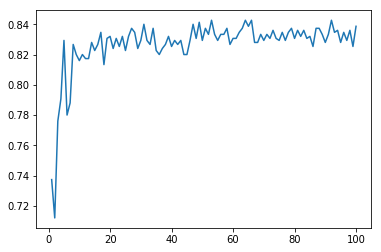

In [49]:
#Dividing training data using crossfold
randomize_indices = np.random.choice(songs.shape[0], songs.shape[0], replace=False) 
folds = 10
maxTrees = 100
correctness = np.zeros((maxTrees,folds))

for j in range(folds):
    n=np.ceil(songs.shape[0]/folds)
    validationIndex=np.arange(j*n, min(j*n+n,songs.shape[0]), 1).astype('int')
    randomize_validationIndex = randomize_indices[validationIndex]
    train = songs.iloc[~songs.index.isin(randomize_validationIndex)]
    test = songs.iloc[randomize_validationIndex]  
    xTrain = train.drop(columns=['label','index'])
    yTrain = train['label']
    xTest = test.drop(columns=['label','index'])
    yTest = test['label']
    for i in range(maxTrees):
        rf = sklearn.ensemble.RandomForestClassifier(n_estimators=i+1)
        rf.fit(xTrain,yTrain)
        pred = rf.predict(xTest)
        correctness[i][j]=np.mean(pred==yTest)
        

avgCorr = []
for i in range(maxTrees):
    avgCorr.append(np.mean(correctness[i][:]))
K = np.linspace(1,maxTrees,maxTrees)
plt.plot(K,avgCorr)
plt.show()



In [47]:
np.mean(correctness)
pred.shape

(750,)

In [23]:
classSongs = classify_songs.drop(columns=['index'])
pred = rf.predict(classSongs)
print(pred)

[1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1
 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1
 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1]


In [8]:
#implementing dummy varibles for the key parameter.
trainI = np.random.choice(songs.shape[0],size=700, replace=False)
trainIndex = songs.index.isin(trainI)
train = songs.iloc[trainIndex]
test = songs.iloc[~trainIndex]
#Training data
print(test.shape)
print(train.shape)
dummies = pd.get_dummies(songs, columns=['key','time_signature'])
train = dummies.iloc[trainIndex]
test = dummies.iloc[~trainIndex]
xTest = test.drop(columns=['label','index'])
xTrain = train.drop(columns=['label','index'])
yTrain = train['label']
yTest = test['label']
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=60)
rf.fit(xTrain,yTrain)
pred = rf.predict(xTest)
correctness = []
correctness.append(np.mean(pred==yTest))
print(correctness)

(50, 15)
(700, 15)
[0.83999999999999997]


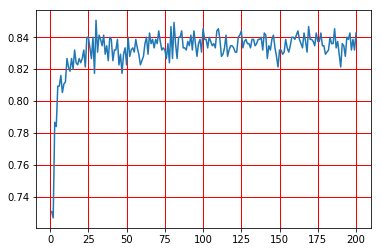

In [16]:
#Dividing training data using crossfold and adding dummy variables for key and time_signature
randomize_indices = np.random.choice(songs.shape[0], songs.shape[0], replace=False) 
dummies = pd.get_dummies(songs, columns=['key','time_signature'])
folds = 10
maxTrees = 200
correctness = np.zeros((maxTrees,folds))
#Iterating over 
for j in range(folds):
    n=np.ceil(songs.shape[0]/folds)
    validationIndex=np.arange(j*n, min(j*n+n,songs.shape[0]), 1).astype('int')
    randomize_validationIndex = randomize_indices[validationIndex]
    train = dummies.iloc[~dummies.index.isin(randomize_validationIndex)]
    test = dummies.iloc[dummies.index.isin(randomize_validationIndex)]  
    xTrain = train.drop(columns=['label','index'])
    yTrain = train['label']
    xTest = test.drop(columns=['label','index'])
    yTest = test['label']
    
    for i in range(maxTrees):
        rf = sklearn.ensemble.RandomForestClassifier(n_estimators=i+1)
        rf.fit(xTrain,yTrain)
        pred = rf.predict(xTest)
        correctness[i][j]=np.mean(pred==yTest)
        

avgCorr = []
for i in range(maxTrees):
    avgCorr.append(np.mean(correctness[i][:]))
K = np.linspace(1,maxTrees,maxTrees)
plt.plot(K,avgCorr)
plt.grid(color='r', linestyle='-', linewidth=1)

plt.show()


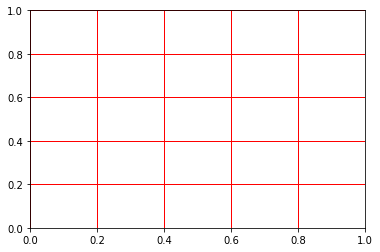

In [15]:
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [85]:
print(avgCorr.index(max(avgCorr)))

63


In [82]:
dummies = pd.get_dummies(classify_songs, columns=['key','time_signature'])
classSongs = dummies.drop(columns=['index'])

pred = rf.predict(classSongs)
print(pred)

[0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1
 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1]


In [88]:
#optimal tree lengths = 64
trainI = np.random.choice(songs.shape[0],size=750, replace=False)
trainIndex = songs.index.isin(trainI)
train = songs.iloc[trainIndex]
test = songs.iloc[~trainIndex]
#Training data
dummies = pd.get_dummies(songs, columns=['key','time_signature'])
train = dummies.iloc[trainIndex]
xTrain = train.drop(columns=['label','index'])
yTrain = train['label']
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=64)

rf.fit(xTrain,yTrain)

dummies = pd.get_dummies(classify_songs, columns=['key','time_signature'])
classSongs = dummies.drop(columns=['index'])

pred = rf.predict(classSongs)
print(pred)

[0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1
 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1
 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1]


In [18]:
string = np.array2string(pred)
string.replace(" ", "")

'[1110111000011110101111101101001110101\n0011011111111000011011000111111111100\n1]'

In [22]:
#simple TDB
randomize_indices = np.random.choice(songs.shape[0], songs.shape[0], replace=False) 
dummies = pd.get_dummies(songs, columns=['key','time_signature'])
folds = 10
maxDepths = 200
correctness = np.zeros((maxDepths,folds))
corr = []
#Iterating over 
for j in range(folds):
    n=np.ceil(songs.shape[0]/folds)
    validationIndex=np.arange(j*n, min(j*n+n,songs.shape[0]), 1).astype('int')
    randomize_validationIndex = randomize_indices[validationIndex]
    train = dummies.iloc[~dummies.index.isin(randomize_validationIndex)]
    test = dummies.iloc[dummies.index.isin(randomize_validationIndex)]  
    xTrain = train.drop(columns=['label','index'])
    yTrain = train['label']
    xTest = test.drop(columns=['label','index'])
    yTest = test['label']
    

    rf = tree.DecisionTreeClassifier()
    rf.fit(xTrain,yTrain)
    pred = rf.predict(xTest)
    #correctness[i][j]=np.mean(pred==yTest)
    corr.append(np.mean(pred==yTest))


#avgCorr = []
#for i in range(maxDpeths):
#    avgCorr.append(np.mean(correctness[i][:]))
##K = np.linspace(1,maxDepths,maxDepths)
#plt.plot(K,avgCorr)
#plt.grid(color='r', linestyle='-', linewidth=1)

#plt.show()
print(np.mean(corr))


0.768
